In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/kaggle/input/emotion-text-data/tweet_emotions.csv')
df.head()

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


In [3]:
print(df['sentiment'].value_counts())
print(df.isnull().sum())

sentiment
neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: count, dtype: int64
tweet_id     0
sentiment    0
content      0
dtype: int64


Text(0.5, 1.0, 'Percentage of each emotion')

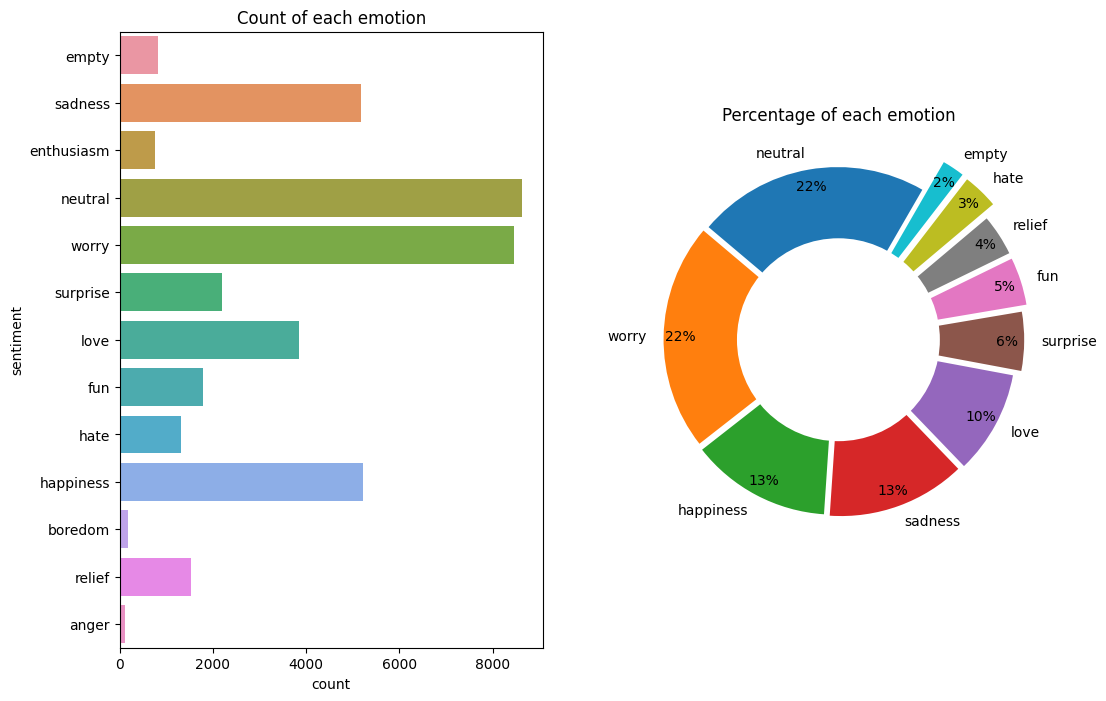

In [4]:
col = 'sentiment'
fig, (ax1, ax2)  = plt.subplots(nrows=1, ncols=2, figsize=(12,8))
value_counts = df['sentiment'].value_counts()[:10]  # This is a pandas Series
labels = list(value_counts.index)         # Convert index to list of
sizes = list(value_counts)[:10]
explode = list(np.array(sizes) / sum(sizes))[::-1]

ax2.pie(sizes,  explode=explode, startangle=60, labels=labels,autopct='%1.0f%%', pctdistance=0.9)
ax2.add_artist(plt.Circle((0,0),0.6,fc='white'))
sns.countplot(y=col, data=df, ax=ax1)
ax1.set_title("Count of each emotion")
ax2.set_title("Percentage of each emotion") 

In [5]:
specific_values = ['neutral','worry', 'happiness', 'sadness', 'love', 'surprise', 'fun', 'relief', 'hate', 'empty']
df['sentiment'] = df['sentiment'].where(df['sentiment'].isin(specific_values), other = 'other')

Text(0.5, 1.0, 'Percentage of each emotion')

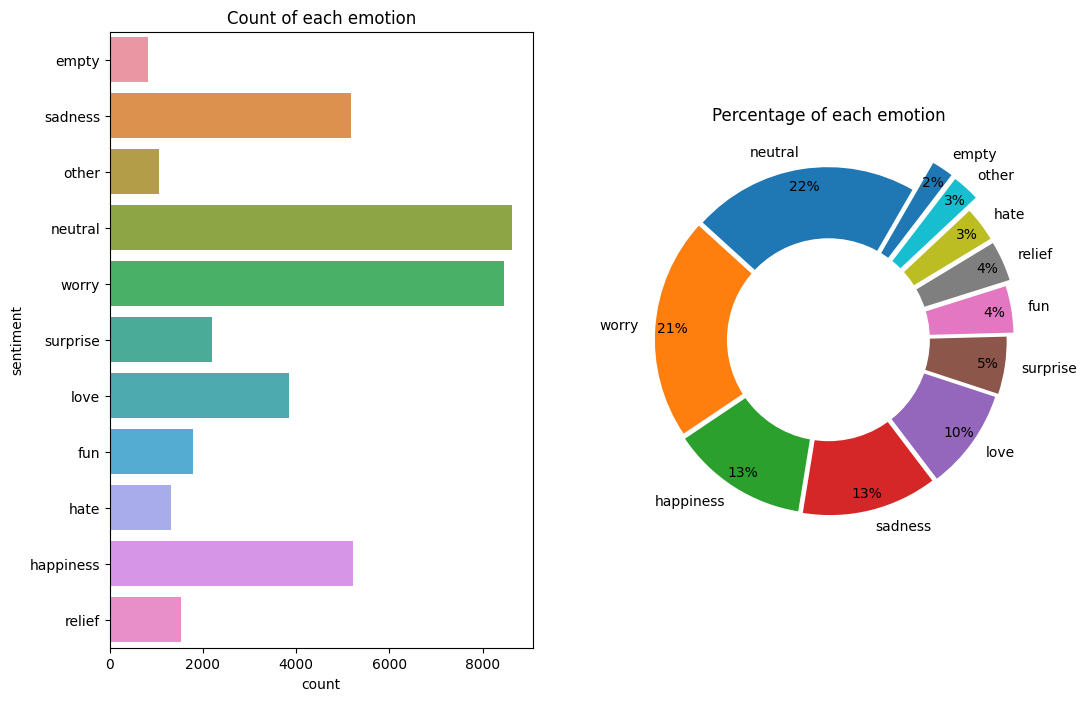

In [6]:
col = 'sentiment'
fig, (ax1, ax2)  = plt.subplots(nrows=1, ncols=2, figsize=(12,8))
value_counts = df['sentiment'].value_counts()  # This is a pandas Series
labels = list(value_counts.index)         # Convert index to list of
sizes = list(value_counts)
explode = list(np.array(sizes) / sum(sizes))[::-1]

ax2.pie(sizes,  explode=explode, startangle=60, labels=labels,autopct='%1.0f%%', pctdistance=0.9)
ax2.add_artist(plt.Circle((0,0),0.6,fc='white'))
sns.countplot(y=col, data=df, ax=ax1)
ax1.set_title("Count of each emotion")
ax2.set_title("Percentage of each emotion") 

In [7]:
df['char_count'] = df['content'].apply(lambda x:len(x))
df['token_count'] = df['content'].apply(lambda x:len(x.split(" ")))
df

,tweet_id,sentiment,content,char_count,token_count
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...,92,19
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...,60,11
2,1956967696,sadness,Funeral ceremony...gloomy friday...,35,3
3,1956967789,other,wants to hang out with friends SOON!,36,7
4,1956968416,neutral,@dannycastillo We want to trade with someone w...,86,15
...,...,...,...,...,...
39995,1753918954,neutral,@JohnLloydTaylor,16,1
39996,1753919001,love,Happy Mothers Day All my love,30,7
39997,1753919005,love,Happy Mother's Day to all the mommies out ther...,123,25
39998,1753919043,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...,122,20


/tmp/ipykernel_13/3203899025.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['char_count'], ax=ax1)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_13/3203899025.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms)

<Axes: xlabel='token_count', ylabel='Density'>

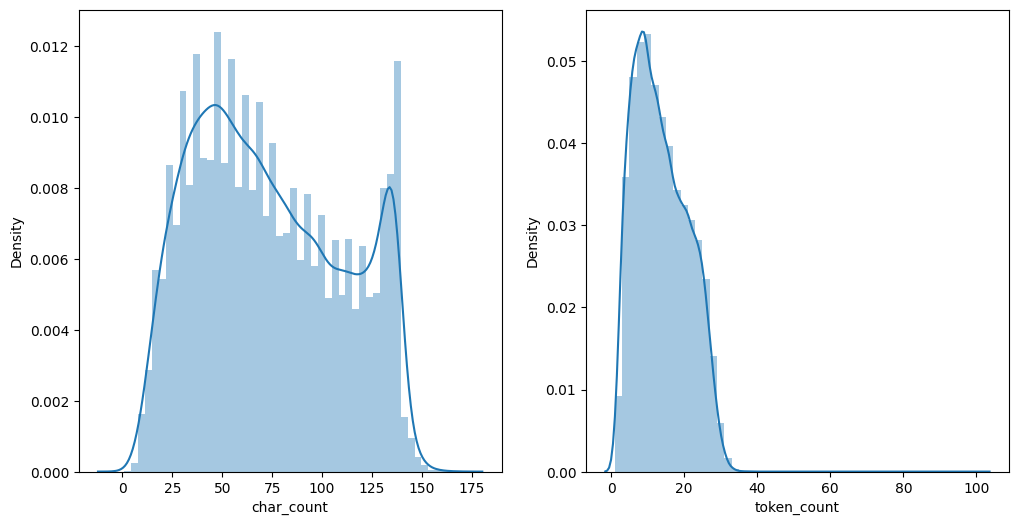

In [8]:
fig, (ax1, ax2)  = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
sns.distplot(df['char_count'], ax=ax1)
sns.distplot(df['token_count'], ax=ax2)

In [9]:
!pip install inflect
!pip install contractions
!pip install bs4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.1/345.1 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.9/113.9 kB 7.6 MB/s eta 0:00:00


In [10]:
from bs4 import BeautifulSoup  # For HTML tag removal
import unicodedata as unicode# For non-ASCII character normalization
import nltk  # For tokenization and stopwords
from nltk.corpus import stopwords  # For stopword removal
from nltk.stem import WordNetLemmatizer  # For lemmatization
import inflect  # For converting numbers to words
import contractions  # For expanding contractions
import re  # For regular expressions (punctuation removal)
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [11]:
def text_preprocessing_platform(df, col, remove_stopwords = True):
    
    def denoise(text):
        soup = BeautifulSoup(text, "html.parser")
        text = soup.get_text()
        # to remove contractions
        text = contractions.fix(text)
        return text

    def remove_non_ascII(words):
        new_words = []
        for word in words:
            new_word = unicode.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
            new_words.append(new_word)
        return new_words

    def to_lowercase(words):
        new_words = []
        for word in words:
            new_word = word.lower()
            new_words.append(new_word)
        return new_words

    def remove_punctuation(words):
        new_words = []
        for word in words:
            new_word = re.sub(r'[^\w\s]', '', word)
            if new_word != '':
                new_words.append(new_word)
        return new_words

    def replace_numbers(words):
        p = inflect.engine()
        new_words = []
        for word in words:
            if word.isdigit():
                new_word = p.number_to_words(word)
                new_words.append(new_word)
            else:
                new_words.append(word)
        return new_words

    def remove_stopwords(words):
        new_words = []
        for word in words:
            if word not in stopwords.words('english'):
                new_words.append(word)
        return new_words

    def lemmatize_verbs(words):
        lemmatizer = WordNetLemmatizer()
        new_words = []
        for word in words:
            new_word = lemmatizer.lemmatize(word, pos='v')
            new_words.append(new_word)
        return new_words

    def normalize(words):
        words = remove_non_ascII(words)
        words = to_lowercase(words)
        words = remove_punctuation(words)
        words = replace_numbers(words)
        if remove_stopwords:
            words = remove_stopwords(words)
        words = lemmatize_verbs(words)
        return words

    def tokenize(text):
        return nltk.word_tokenize(text)
    
    def text_preprocess(text):
        text = denoise(text)
        words = tokenize(text)
        words = normalize(words)
        return " ".join(words)

    df[col] = [text_preprocess(x) for x in df[col]]

    return df

In [12]:
print("Before Text Preprocessing")
display(df.head()[['content']])
processed_df = text_preprocessing_platform(df, 'content', remove_stopwords=False)
print("After Text Preprocessing")
display(processed_df.head()[['content']])

Before Text Preprocessing


,content
0,@tiffanylue i know i was listenin to bad habi...
1,Layin n bed with a headache ughhhh...waitin o...
2,Funeral ceremony...gloomy friday...
3,wants to hang out with friends SOON!
4,@dannycastillo We want to trade with someone w...


After Text Preprocessing


,content
0,tiffanylue know listenin bad habit earlier sta...
1,layin n bed headache ughhhh waitin call
2,funeral ceremony gloomy friday
3,want hang friends soon
4,dannycastillo want trade someone houston ticke...


In [13]:
# Model Building
import keras
from keras.layers import Dropout, Dense, GRU, Embedding, LSTM, Bidirectional, TimeDistributed, Flatten
from keras.models import Sequential
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import matthews_corrcoef, confusion_matrix
from sklearn import metrics
from sklearn.utils import shuffle
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import warnings

# Logging
import logging
logging.basicConfig(level=logging.INFO)

2025-10-03 19:26:39.550860: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1759519599.850696      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1759519599.937326      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [14]:
sentences = [text.split() for text in processed_df['content']]

In [15]:
import gensim
from gensim.models import Word2Vec

# CBOW model (sg=0, default)
w2v_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, sg=0)


In [16]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

tokenizer = Tokenizer()
tokenizer.fit_on_texts([' '.join(sent) for sent in sentences])  # sentences is list of token lists
word_index = tokenizer.word_index

In [17]:
sequences = tokenizer.texts_to_sequences([' '.join(sent) for sent in sentences])

In [18]:
maxlen = 100  # Choose based on your data
X = pad_sequences(sequences, maxlen=maxlen)

In [19]:
embedding_dim = 100  # Same as your Word2Vec vector size
embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))
for word, i in word_index.items():
    if word in w2v_model.wv:
        embedding_matrix[i] = w2v_model.wv[word]

In [20]:
from tensorflow.keras.layers import Embedding

embedding_layer = Embedding(
    input_dim=embedding_matrix.shape[0],
    output_dim=embedding_matrix.shape[1],
    weights=[embedding_matrix],
    input_length=X.shape[1],  # usually maxlen from earlier
    trainable=False  # set True if you want to fine-tune embeddings
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
2025-10-03 19:27:24.832819: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [21]:
print(embedding_layer.get_weights())

[array([[ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [-1.3570700e-02,  8.3892375e-01,  1.9481254e-01, ...,
        -1.2266604e+00,  1.6839085e-02,  4.2812738e-01],
       [-2.0447904e-02,  8.1285191e-01,  3.6959031e-01, ...,
        -1.2791446e+00,  2.1077935e-02,  4.7881711e-01],
       ...,
       [-2.8640393e-04,  6.8883644e-03,  1.4324436e-02, ...,
        -1.7794661e-02,  1.4337906e-02,  3.1774114e-03],
       [-9.3701007e-03,  6.2293638e-03,  7.1538575e-03, ...,
        -2.0565931e-02,  1.4642793e-02,  8.7381052e-03],
       [-5.8029718e-03,  1.3496297e-03,  1.0297525e-02, ...,
        -9.3847364e-03, -6.9900253e-04, -5.5900062e-03]], dtype=float32)]


In [22]:
X = pad_sequences(sequences, maxlen=maxlen)
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['sentiment'])  # Replace 'sentiment' with your label column name

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense

nclasses = len(np.unique(y))   # Number of unique classes (emotions) in your target variable

model = Sequential()
model.add(embedding_layer)
model.add(Bidirectional(LSTM(32, return_sequences=True, recurrent_dropout=0.5)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(32, recurrent_dropout=0.5)))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dense(nclasses, activation='softmax'))

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


In [24]:
print(X.shape)  # Should be (num_samples, sequence_length)
print(y.shape)  # Should be (num_samples,)

(40000, 100)
(40000,)


In [25]:
# Train the model
history = model.fit(
    X,
    y,
    batch_size=32,
    epochs=10,
    validation_split=0.1
)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 159s 131ms/step - accuracy: 0.2410 - loss: 2.1333 - val_accuracy: 0.2690 - val_loss: 2.1085
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 146s 130ms/step - accuracy: 0.2651 - loss: 2.0774 - val_accuracy: 0.2620 - val_loss: 2.0895
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 146s 130ms/step - accuracy: 0.2767 - loss: 2.0626 - val_accuracy: 0.2385 - val_loss: 2.1228
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 203s 131ms/step - accuracy: 0.2850 - loss: 2.0424 - val_accuracy: 0.2615 - val_loss: 2.0648
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 148s 131ms/step - accuracy: 0.2843 - loss: 2.0432 - val_accuracy: 0.2610 - val_loss: 2.0810
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 148s 131ms/step - accuracy: 0.2861 - loss: 2.0335 - val_accuracy: 0.2580 - val_loss: 2.1003
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 148s 131ms/step - accuracy: 0.2942 - loss: 2.0332 - val_accuracy: 0.2718 - val_loss: 2.0839
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 148s 132ms/step - ac

In [26]:
print(np.isnan(X).sum(), np.isnan(y).sum())
print(np.any(pd.isnull(X)), np.any(pd.isnull(y)))


0 0
False False
